# Evaluation of Classification Models

This notebook aims to describe the techniques for the evaluation of classification models. The logistic regression classification model and the iris dataset will be used to describe and use several performance metrics such as accuracy, confusion matric, recall, etc.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris


## Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [2]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )

df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Encoding the class label and remove one of the classes

Encoding the class label and remove one of the classes


In [3]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

# Visualize the dataset
df.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Now the label/category is numeric

Remove all aobservation from one of the classes

In [4]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
Label2Remove = 3 # (1,2,3)
df = df[df.Flower!=Label2Remove]
df

# NOTE: comment this if cell if you want to use the three classes


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,2
96,5.7,2.9,4.2,1.3,2
97,6.2,2.9,4.3,1.3,2
98,5.1,2.5,3.0,1.1,2


# Evaluation of classification models

Get dataset of variables **X** and labels **y**

In [5]:
# Select variables (one, two, three, four?)
X  = df[["Sepal_Length", "Sepal_Width"]].values
#X  = df[["Petal_Length", "Petal_Width"]].values
#X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values



In [31]:
X.shape

(100, 2)

In [32]:
y.shape

(100,)

## Holdout

Holdout: spliting the dataset in train and test sets once

In [6]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.90) # , random_state = 0


In [7]:
print(Xtrain.shape)
print(Xtest.shape)


(10, 2)
(90, 2)


In [8]:
print(ytrain.shape)
print(ytest.shape)


(10,)
(90,)


Train the classification model

In [9]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression

# Fit the model for the training data
classifier1   = LogisticRegression(C=1e5)
classifier1.fit(Xtrain, ytrain)


LogisticRegression(C=100000.0)

In [10]:
# Make the predictions using the test set
ypred        = classifier1.predict(Xtest)


In [11]:
# Explore real and predicted labels
print(ytest[0:29])
print(ypred[0:29])


[1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 2 2 1 2]
[1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 2 2 1 2]


Compute the acurracy of the model using the test set

In [12]:
# Accuracy

# Define a function to compute accuracy
def My_Accuracy(actual, predicted):
    acc = np.sum(np.equal(actual, predicted)) / len(actual)
    return acc

#def My_Accuracy(actual, predicted):
#    correct = 0
#    for i in range(len(actual)):
#        if actual[i] == predicted[i]:
#            correct += 1
#    return correct / float(len(actual)) * 100.0


In [13]:
acc1 = 100 * My_Accuracy(ytest, ypred)
acc1


98.88888888888889

In [14]:
from sklearn.metrics import accuracy_score

acc2 = 100*accuracy_score(ytest, ypred)
acc2


98.88888888888889

There are some classification errors.

To better analyze our results let's compute the confusion matrix

In [15]:
# Define a function to compute confusion matrix
def My_Confusion_Matrix(pred,original):
    
    # Initialize a 2x2 matrix for the confusion matrix
    CM = np.zeros((2,2)) 
    
    # This confusion matrix is for 2 classes
    for i in range(len(pred)): 
        
        if   int(original[i])==1 and int(pred[i])==1: 
            CM[0,0] += 1 # TN
            
        elif int(original[i])==1 and int(pred[i])==2:
            CM[1,0] += 1 # FP 
            
        elif int(original[i])==2 and int(pred[i])==2:
            CM[1,1] += 1 # TP
        
        elif int(original[i])==2 and int(pred[i])==1:
            CM[0,1] += 1 # FN
            
    return CM


In [16]:
#cm = My_Confusion_Matrix(ytest, ypred)
#cm


In [17]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(ytest, ypred)
CM


array([[44,  1],
       [ 0, 45]], dtype=int64)

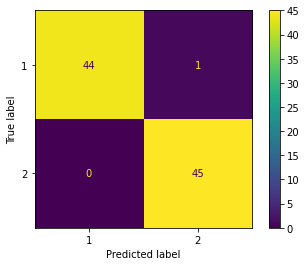

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=classifier1.classes_)
disp.plot()
plt.show()


In [19]:
CMnorm = confusion_matrix(ytest, ypred, normalize = 'true')
CMnorm


array([[0.97777778, 0.02222222],
       [0.        , 1.        ]])

Let's plot the confusion matrix

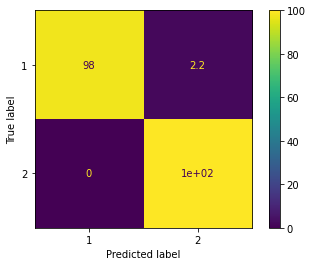

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=100*CMnorm, display_labels=classifier1.classes_)
disp.plot()
plt.show()


In [21]:
# Compute other metrics

precision = CM[0,0]/(CM[0,0]+CM[0,1])
print("Precision:",precision)

recall = CM[0,0]/(CM[0,0]+CM[1,0])
print("Recall:",recall)

specificity=CM[1,1]/(CM[0,1]+CM[1,1])
print("Specificity:",specificity)

f1 = 2*(precision*recall)/(precision+recall)
print("F1 score:",f1)


Precision: 0.9777777777777777
Recall: 1.0
Specificity: 0.9782608695652174
F1 score: 0.9887640449438202


## Holdout k-times (Monte-Carlo)

## k-fold

Check the acurracy of the model using k-fold cross-validation

In [22]:
# Import sklearn cross_val_score
from sklearn.model_selection import cross_val_score

classifier2   = LogisticRegression(C=1e5)

cv_acc = cross_val_score(estimator = classifier2, X = X, y = y, cv = 10, scoring='accuracy')
cv_acc


array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. ])

In [23]:
cv_acc.shape

(10,)

In [24]:
print("Accuracy: {:.2f} %".format(cv_acc.mean()*100))
print("Standard Deviation: {:.2f} %".format(cv_acc.std()*100))


Accuracy: 99.00 %
Standard Deviation: 3.00 %


The is the accuracy of our model computed with k-fold cross-validation

In [25]:
# More metrics
#recall     = cross_val_score(estimator = classifier2, X = X, y = y, cv = 5, scoring='recall')
#precision  = cross_val_score(estimator = classifier2, X = X, y = y, cv = 5, scoring='precision')
#accuracy   = cross_val_score(estimator = classifier2, X = X, y = y, cv = 5, scoring='accuracy')
#f1_score   = cross_val_score(estimator = classifier2, X = X, y = y, cv = 5, scoring='precision')

# BE AWARE OF THE LABELS ¡


In [26]:
#precision


In [27]:
#f1_score


## Repeated k-fold

Check the acurracy of the model using repeated k-fold cross-validation

In [28]:
from sklearn.model_selection import RepeatedKFold

classifier3   = LogisticRegression(C=1e5)

RCV           = RepeatedKFold(n_splits=5, n_repeats=50, random_state=1)
RCVresults    = cross_val_score(classifier3, X, y, cv=RCV, scoring='accuracy')
RCVresults


array([1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.95, 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 0.95,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95,
       1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 0.95,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.95, 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.95, 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  ,
       1.  , 1.  , 1.  , 0.95, 0.95, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 0.95, 1.  , 1.  , 0.95, 1.  ,
       1.  , 1.  , 0.95, 1.  , 1.  , 1.  , 1.  , 1.

In [29]:
print("Accuracy: {:.2f} %".format(RCVresults.mean()*100))
print("Standard Deviation: {:.2f} %".format(RCVresults.std()*100))


Accuracy: 99.10 %
Standard Deviation: 1.92 %


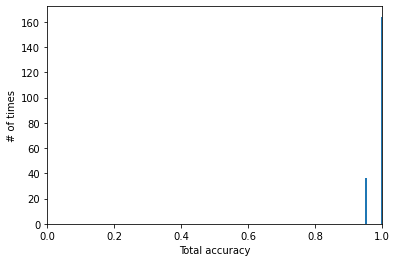

In [30]:
#plt.hist(RCVresults)
plt.hist(RCVresults, rwidth=0.9, bins=10, density = 1)
plt.xlabel("Total accuracy")
plt.ylabel("# of times")
plt.xlim([0,1])
plt.show()


## Leave P Out (LPO)

Check the acurracy of the model using Leave P Out (LPO) cross-validation

## Leave One Out (LOO)

Check the acurracy of the model using Leave One Out (LOO) cross-validation

# Final remarks

- Evaluation of classification model is critical
- Train and test set have to be mutually exclusive
- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold
- https://scikit-learn.org/stable/modules/cross_validation.html
